In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from geopy import distance
import geopandas
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from keras import metrics
from geopy.distance import distance
from dateutil.relativedelta import relativedelta
import datetime
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

c:\Users\navne\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\navne\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\navne\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\Users\navne\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def calculate_distance(row):
    point1 = (row['lat'], row['long'])
    point2 = (row['merch_lat'], row['merch_long'])
    dist= distance(point1, point2).km
    return dist

In [3]:
def predict(test_file):
    model = tf.keras.models.load_model('FinalModel')
    df = pd.read_csv(test_file)
    df.drop(columns={"Unnamed: 0"}, inplace=True)
    df['dist'] = df.apply(calculate_distance, axis=1)
    df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d')
    now = datetime.datetime.now()
    df['age'] = df['dob'].apply(lambda x: relativedelta(now, x).years)
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
    df['hour'] = df['trans_date_trans_time'].dt.hour
    df['day'] = df['trans_date_trans_time'].dt.day
    df['weekday'] = df['trans_date_trans_time'].dt.weekday
    df['month'] = df['trans_date_trans_time'].dt.month
    df['year'] = df['trans_date_trans_time'].dt.year
    eps = 0.001 # 0 => 0.1¢
    df['amt'] = np.log(df.pop('amt')+eps) 
    df = df.drop(columns =['trans_date_trans_time', 'dob', 'lat', 'long', 'merch_lat', 'merch_long',
                       'merchant', 'first', 'last', 'street', 'job','trans_num','unix_time','zip','city_pop','state'])
    df = pd.get_dummies(df, drop_first=True)
    test_labels = np.array(df.pop('is_fraud'))
    test_features = np.array(df)
    scale = StandardScaler()
    test_features = scale.fit_transform(test_features)
    model.summary()
    model.evaluate(test_features, test_labels)
    y_pred = model.predict(test_features)
    # Convert probabilities to binary labels
    y_pred_binary = np.where(y_pred > 0.5, 1, 0)
    labels = ['non-fraud', 'fraud']
    cm = confusion_matrix(test_labels, y_pred_binary)
    sns.heatmap(cm, annot=True,fmt='d')
    plt.title('Confusion Matrix')
    plt.show()
    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))


    

In [4]:
#predict('your_file')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 350)               320950    
                                                                 
 dropout (Dropout)           (None, 350)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               70200     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 391,351
Trainable params: 391,351
Non-trainable params: 0
_________________________________________________________________
40522/40522 [==============================] - 110

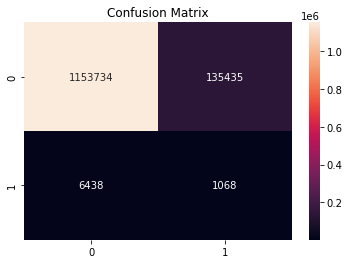

Legitimate Transactions Detected (True Negatives):  1153734
Legitimate Transactions Incorrectly Detected (False Positives):  135435
Fraudulent Transactions Missed (False Negatives):  6438
Fraudulent Transactions Detected (True Positives):  1068
Total Fraudulent Transactions:  7506


In [6]:
predict("https://jrssbcrsefilesnait.blob.core.windows.net/3950data1/fraudTrain.csv.zip")

I have dropped unnamed column which was removed by you
i am not sure if your testing file would have that column or not 
please comment/uncomment if u have already removed the column-unnamed in testing file.